We can calculate the vollume of a cities transport network in People moved per 24h

1. calculate trips per hour


In [34]:
from utils import load_stop_times_df
import pandas as pd
from datetime import datetime
import math as m
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline
import numpy as np

# df = load_stop_times_df("GER_Saxony_Leipzig")

city = "US_Arizona_Phoenix"
name = " ".join((city.split("_")[1:]))

print(name)

df = load_stop_times_df(city)

df["arrival_time"] = pd.to_datetime(df.arrival_time, errors = "coerce", format = "%H:%M:%S")
df["departure_time"] = pd.to_datetime(df.departure_time, errors = "coerce", format = "%H:%M:%S")

Arizona Phoenix


e:\TSA\Datascience2\utils.py:32: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep = ",", header = 0)
C:\Users\Lauris\AppData\Local\Temp\ipykernel_4756\2160226694.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["arrival_time"] = pd.to_datetime(df.arrival_time, errors = "coerce", format = "%H:%M:%S")
C:\Users\Lauris\AppData\Local\Temp\ipykernel_4756\2160226694.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["depart

In [35]:
resdict = {}

for i in range(0, 24):

    # year, month, day, uhrzeit
    time_format = '%m/%d/%Y %H:%M:%S'

    # startuhrzeit
    hour = datetime(1900, 1, 1, i,0,0 )

    # enduhrzeit, da 24 Uhr gleich 0 sein muss, 
    # Datensatz ist komisch, deswegen zwischen 23 und 0 Uhr keine Fahrten
    if i != 24:
        hour_later = hour + pd.Timedelta(hours = 1)
        #print(hour_later)
    else:
        hour_later = datetime.strptime("01/01/1900 " + "00:00:00", time_format)

    number = len(df.query("@hour <= arrival_time <= @hour_later"))
    
    # print("von", hour, "bis", hour_later, number)

    resdict[i] = number

# we dont have values between 23 and 24, datetimes are hard, this aproximates it and makes the graph prettier :)
resdict[24] = resdict[0]

reslist = []
for i in resdict.values():
    reslist.append(i)

In [36]:
x = list(resdict.keys())
y = list(resdict.values())

# y = [i / 1000 for i in y]

x_smooth = np.linspace(min(x), max(x), 300)  

spl = make_interp_spline(x, y, k=1)  # type: BSpline
y_smooth = spl(x_smooth)
y_smooth[y_smooth<0]=0 


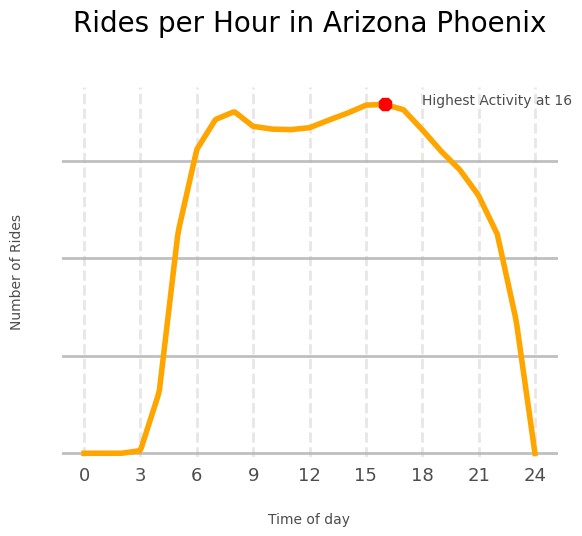

In [47]:
# TODO add info like Peak, average to plot, change font

plt.plot(x_smooth, y_smooth, linewidth = 4, color = "orange")


plt.title("Rides per Hour in " + name, fontsize = 20, pad=40)
plt.ylabel("Number of Rides", labelpad = 20, alpha = 0.7)
plt.xlabel("Time of day",  labelpad = 20, alpha = 0.7)
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(4))
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))

plt.xticks(fontsize = 13, alpha = 0.7)
plt.yticks(fontsize = 10, alpha = 0.7)

peakx = np.argmax(y)
peaky = np.max(y)
plt.plot(peakx, peaky, marker = "8", markersize = 10, color = "red")

plt.text(s = "Highest Activity at " + str(peakx),  x = peakx + 2, y = peaky, color = "black", alpha = 0.7)

plt.ylim(ymin=-1000)
plt.grid(which = "major", axis = "y", alpha = 0.8, linewidth=2)
plt.grid(which = "major", axis = "x", alpha = 0.3, linestyle = "dashed", linewidth=2)
plt.box(False)
plt.gca().axes.yaxis.set_ticklabels([])
plt.tick_params(bottom = False)
plt.tick_params(left = False)
plt.gca().yaxis.get_major_ticks()[0].label1.set_visible(False)
plt.show()